
## Introduction : Bias-Variance Trade-off

In ML, we strive to minimize error. This error is due to:
- Bias
- Variance
- Irreducible error (due to noise)

Your goal as a data scientist is to make the Bias and Variance as small as possible. What's the problem? In reality, when we lower the variance, the bias increases and when we lower the bias, the variance increases.

You have to find a good balance, a trade-off, between these 2 things :
![bias-variance trade-off](https://www.francescopochetti.com/wp-content/uploads/2017/02/biasvariance-492x270.png).

Another great visualization that helps understand this concept is the bull's eye:
![bias-variance trade-off](https://qph.fs.quoracdn.net/main-qimg-a55358a5a12b02c3f71010c965a2c4dc).

You have seen this before in the context of overfitting.

So, the question is :
- Is it possible to achieve lower variance and lower bias at the same time?
- The trade-off occurs in the context of altering the complexity of the same model
- Could we combine several models? We will explore this concept trough this challenge...



## Bootstrapping

The **bootstrapping (aka resampling)** is a key concept. 

What's "magic" about this :
- you have the same data;
- you calculate the same thing several times;
- you get better results !

With this first part, we will use the **bootstrap technique** to estimate the **mean and variance** of the dataset.

👉In the cell below, implement the following algorithm in the function `bootstrap_mean_std` :
```
Given X = {X_1, X_2, ..., X_N}
for b = 1..B:
  X_b = sample_with_replacement_from(X)
  sample_means[b] = X.mean()
b_mean = sample_means.mean()
b_std = sample_means.std()
```


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def bootstrap_mean(X, B, N):
    '''TO DO: this function return a tuple (individual_estimates, b_mean, b_std) of
        samples X thanks to the bootstrapping method'''

    return individual_estimates, b_mean, b_std

When you are done, you can run the following code and have a look at the results. The code below is plotting the bootstraped mean and standard deviation estimator.

In [ ]:
from scipy.stats import norm

B = 200
N = 20
X = np.random.randn(N)

# Call of your function
individual_estimates, b_mean, b_std = bootstrap_mean(X, B, N)
print("The mean of X is : ", X.mean())
print("The bootstrap mean of X is : ", b_mean)

plt.hist(individual_estimates, bins=20)

# Calculate the lower and upper bound for 95% Confidence Interval (Bootstrap)
lower = b_mean + norm.ppf(0.025) * b_std
upper = b_mean + norm.ppf(0.975) * b_std

# Calculate the lower and upper bound for 95% Confidence Interval
lower2 = X.mean() + norm.ppf(0.025)*X.std()/np.sqrt(N)
upper2 = X.mean() + norm.ppf(0.975)*X.std()/np.sqrt(N)

# Plot the vertical lines for Confidence Interval (CI)
plt.axvline(x=lower, linestyle="--", color="g", label="Lower bound for 95% CI (bootstrap)")
plt.axvline(x=upper, linestyle="--", color="g", label="Upper bound for 95% CI (bootstrap)")
plt.axvline(x=lower2, linestyle="--", color="r", label="Lower bound for 95% CI")
plt.axvline(x=upper2, linestyle="--", color="r", label="Upper bound for 95% CI")

plt.legend()
plt.show()

👉As you can see, by resampling again and again, computing the estimates for the mean, we average around the exact value, with upper and lower boundaries.

These approximations were made with **bootstraping**. The same thing applies while sampling to estimate our model when using the bagging method

## Bagging (Bootstrap aggregating)

Well done 🎉, now you understand that the we can estimate parameters using bootstraping.

Now let's look at bagging.

It works exactly the same as bootstrapping except instead of calculating several **means**, we train several **models**, and average over them, like the example below

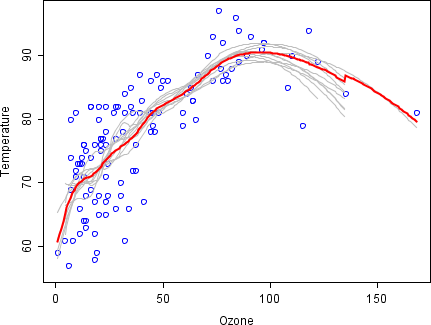

### Bagged Tree Regressor

The algorithm to train your models for bagging regression will work like this :
```
# Training
models = []
for b=1..B:
  model = Model()
  X_b, Y_b = resample(X)
  model.fit(X_b, Y_b)
  models.append(model)
```

And to make predictions :
```
# regression
def predict(X):
    return np.mean([model.predict(X) for model in models], axis=1)
```

Below, we have the declaration of our class **Regressor**

**👉Implement the methods `fit` and `predict` to train your model and make predictions respectively.**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

class BaggedTreeRegressor:
    def __init__(self, B):
        self.B = B

    def fit(self, X, Y):
        pass

    def predict(self, X):
        pass


When it's done, you'll need to complete the code below. The code below is 
1. Generating some fake dataset for you to work on based on a generating function `f`
2. Extracting some training set out of it
3. Training a regular `DecisionTreeRegressor` over the training set and **predicting over the whole dataset**
4. Training with your new `BaggedTreeRegressor` over the training set and **predicting over the whole dataset**
5. Plotting everything

You will need to implement steps 3 and 4 above yourself by completing where indicated

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# the function we want to estimate
def f(x_values):
    return np.array([x**2/(x**2 - 2*x + 2) for x in x_values])

# Generate some mock dataset
T = 100
x = np.linspace(0, 10, T)#np.linspace(0,4*np.pi, T)
y = f(x)#np.sin(x)

# The training set
N = 30
idx = np.random.choice(T, size=N, replace=False)
Xtrain = x[idx].reshape(N, 1)
Ytrain = y[idx]

################################
# USE THE DECISION TREE MODEL  #
################################

# Train + predict + plot with the decision tree model

##################################
# USE  THE BAGGED TREE REGRESSOR #
##################################

# Train + predict + plot with your "custom" bagged tree regressor

##################################
# PLOT BOTH CLASSIFIERS IN TWO GRAPHS
##################################


Can you see the difference? You can try to change the function f(x): 
- $f(x) = sin(2*x)$ where x = np.linspace(0, 4*pi, 100)
- $f(x) = 1/log(x)$ where x = np.linspace(0.00001, 5, 100)
- ...

### Bagged Tree Classifier

Congratulations ! Now, we will apply the same algorithm but in order to **classify** some data this time. 

To train your model it works exactly the same as for regression but to make predictions, it's a little bit different. We will use a voting method instead of using the average value.

For classification between 2 categories (binary), here is the pseudocode:
```
# classification (Binary)
def predict(X):
    output = np.zeros(N)
    for model in models:
        output += model.predict(X)
    return np.round(output/B)
```



Implement the `fit` and `predict` methods again, using `DecisionTreeClassifier` as base model.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

class BaggedTreeClassifier:
    def __init__(self, n_estimators, max_depth=None):
        self.B = n_estimators
        self.max_depth = max_depth

    def fit(self, X, Y):
        pass
        
    def predict(self, X):
        pass


When it's done, complete the following code in order to :
- plot the data we provide vs the predictions made by the **DecisionTreeClassifier (from Scikit-Learn)**
- plot the data vs the predictions made by your **BaggedTreeClassifier**

We implemented for you a function `plot_decision_boundary(X, model, ax1)` in the external module "util.py". You can use it to plot the boundaries between your data : 
- **X** : your data
- **model** : the model you want to use (DecisionTreeClassifier on the first graph and BaggedTreeClassifier on the second)
- **ax1** : the subplot on which you want to display the boundaries

In [ ]:
from sklearn.tree import DecisionTreeClassifier
%run util.py

# We create a fake dataset X,Y

N = 500
D = 2 # dimensionality
X = np.random.randn(N,D)

sep = 2
X[:125] += np.array([sep, sep])
X[125:250] += np.array([sep, -sep])
X[250:375] += np.array([-sep, -sep])
X[375:] += np.array([-sep, sep])
Y = np.array([0]*125 + [1]*125 + [0]*125 + [1]*125)


################################
# USE THE DECISION TREE MODEL  #
################################

# Train + predict + plot with the decision tree model

##################################
# USE THE BAGGED TREE CLASSIFIER #
##################################

# Train + predict + plot with the bagged tree classifier

##################################
# WE PLOT EVERYTHING FOR BOTH CLASSIFIERS #
##################################


You should get a score of 1 for the DecisionTreeClassifier (graph on the left). That means that your model fit perfectly your training data = OVERFITTING. 

On the right, you should have smoother boundaries - what could also be translated as a lower variance